# Importing necessary python packages

In [51]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the CSV File

In [52]:
df=pd.read_csv("unprocessed_aqidata.csv")

In [53]:
df

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3
0,9/17/2020 3:00,0.0,22.1,84.5,28.9,4
1,9/17/2020 4:00,0.0,22.8,80.7,27.5,4
2,9/17/2020 5:00,0.0,24.1,74.9,25.5,4
3,9/17/2020 6:00,0.0,25.5,70.9,21.3,6
4,9/17/2020 7:00,0.0,25.5,69.6,23.6,7
...,...,...,...,...,...,...
9994,11/13/2021 7:00,0.0,11.8,76.5,39.9,24
9995,11/13/2021 8:00,0.0,13.8,63.3,42.9,22
9996,11/13/2021 9:00,0.0,13.7,58.7,45.4,19
9997,11/13/2021 10:00,0.0,13.2,56.0,45.7,22


In [54]:
df.head()

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3
0,9/17/2020 3:00,0.0,22.1,84.5,28.9,4
1,9/17/2020 4:00,0.0,22.8,80.7,27.5,4
2,9/17/2020 5:00,0.0,24.1,74.9,25.5,4
3,9/17/2020 6:00,0.0,25.5,70.9,21.3,6
4,9/17/2020 7:00,0.0,25.5,69.6,23.6,7


In [55]:
df.shape

(9999, 6)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               9999 non-null   object 
 1   Precipitation      9991 non-null   float64
 2   Temperature        9995 non-null   float64
 3   Relative Humidity  9997 non-null   float64
 4   PM25               9999 non-null   float64
 5   O3                 9999 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 468.8+ KB


In [57]:
df.describe()

,Precipitation,Temperature,Relative Humidity,PM25,O3
count,9991.000000,9995.000000,9997.000000,9999.000000,9999.000000
mean,0.083255,18.219770,75.378103,53.970627,21.189019
std,0.627733,6.004639,20.566397,53.367841,15.131770
min,0.000000,2.100000,9.500000,0.000000,0.000000
25%,0.000000,13.800000,62.200000,17.800000,9.000000
50%,0.000000,19.600000,80.200000,35.000000,18.000000
75%,0.000000,22.500000,92.200000,75.850000,31.000000
max,16.400000,30.300000,100.000000,550.100000,93.000000


# VISION OVER COLUMNS

In [58]:
list(df.columns)

['DATE', 'Precipitation', 'Temperature', 'Relative Humidity', 'PM25', 'O3']

# HANDLING MISSING VALUES

In [59]:
df.isnull().sum()

DATE                 0
Precipitation        8
Temperature          4
Relative Humidity    2
PM25                 0
O3                   0
dtype: int64

# LISTING THE CATEGORICAL AND THE NUMERICAL COLUMNS

In [60]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

In [61]:
df[numerical_columns].isnull().sum()

Precipitation        8
Temperature          4
Relative Humidity    2
PM25                 0
O3                   0
dtype: int64

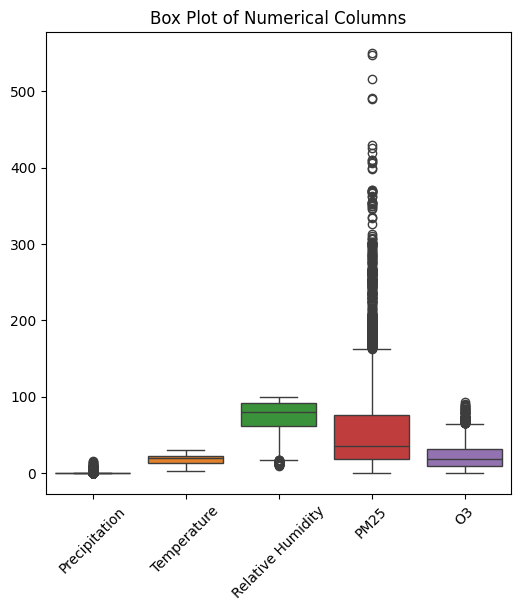

In [62]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Columns')
plt.show()

In [63]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].median())
df[numerical_columns].isnull().sum()

Precipitation        0
Temperature          0
Relative Humidity    0
PM25                 0
O3                   0
dtype: int64

In [64]:
df['PM25'].median()

np.float64(35.0)

# FUNCTION TO DETECT OUTLIERS USING IQR METHOD AND RETURN COLUMN-WISE BOOLEAN IINDICATORS

In [65]:
def find_outliers_iqr(data):
    outliers_mask=pd.Series(index=data.columns,dtype=bool)
    for col in data.columns:
        if col in numerical_columns: #Process only numerical columns
            Q1=data[col].quantile(0.25)
            Q3=data[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-1.5*IQR
            upper_bound=Q1+1.5*IQR
            col_outliers_mask=(data[col]<lower_bound)|(data[col]>upper_bound)
            outliers_mask[col]=col_outliers_mask.any() #True if any outliers detected
    return outliers_mask

outliers_iqr_mask=find_outliers_iqr(df)
print("Outliers detected using IQR method: ")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}:{is_outlier}")

Outliers detected using IQR method: 
DATE:True
Precipitation:True
Temperature:True
Relative Humidity:True
PM25:True
O3:True


In [66]:
def find_outliers_zscore(data, threshold=3):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            col_outliers_mask = z_scores > threshold
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_zscore_mask = find_outliers_zscore(df)
print("\nOutliers detected using Z-score method:")
for col, is_outlier in outliers_zscore_mask.items():
    print(f"{col}: {is_outlier}")


Outliers detected using Z-score method:
DATE: True
Precipitation: True
Temperature: False
Relative Humidity: True
PM25: True
O3: True


# Explanatory Data Analysis

In [67]:
numeric_data=df[numerical_columns]
# Compute pairwise correlation of numeric columns
correlation_matrix=numeric_data.corr()


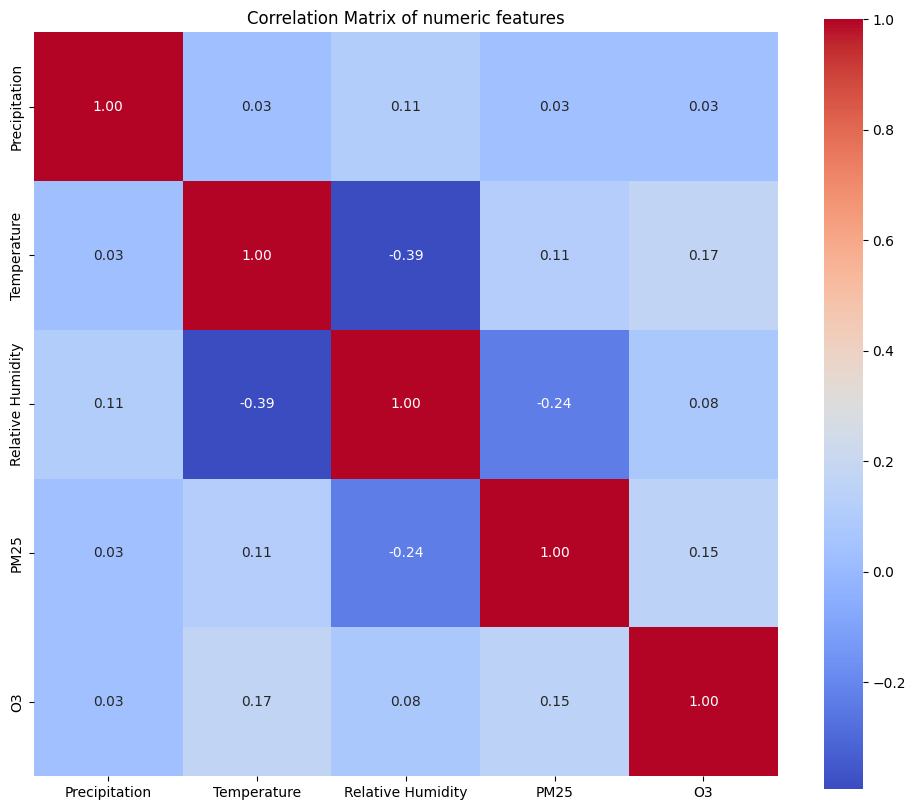

In [68]:
#plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",square=True)
plt.title('Correlation Matrix of numeric features')
plt.show()

In [69]:
df.to_csv('filtered_data.csv',index=False)

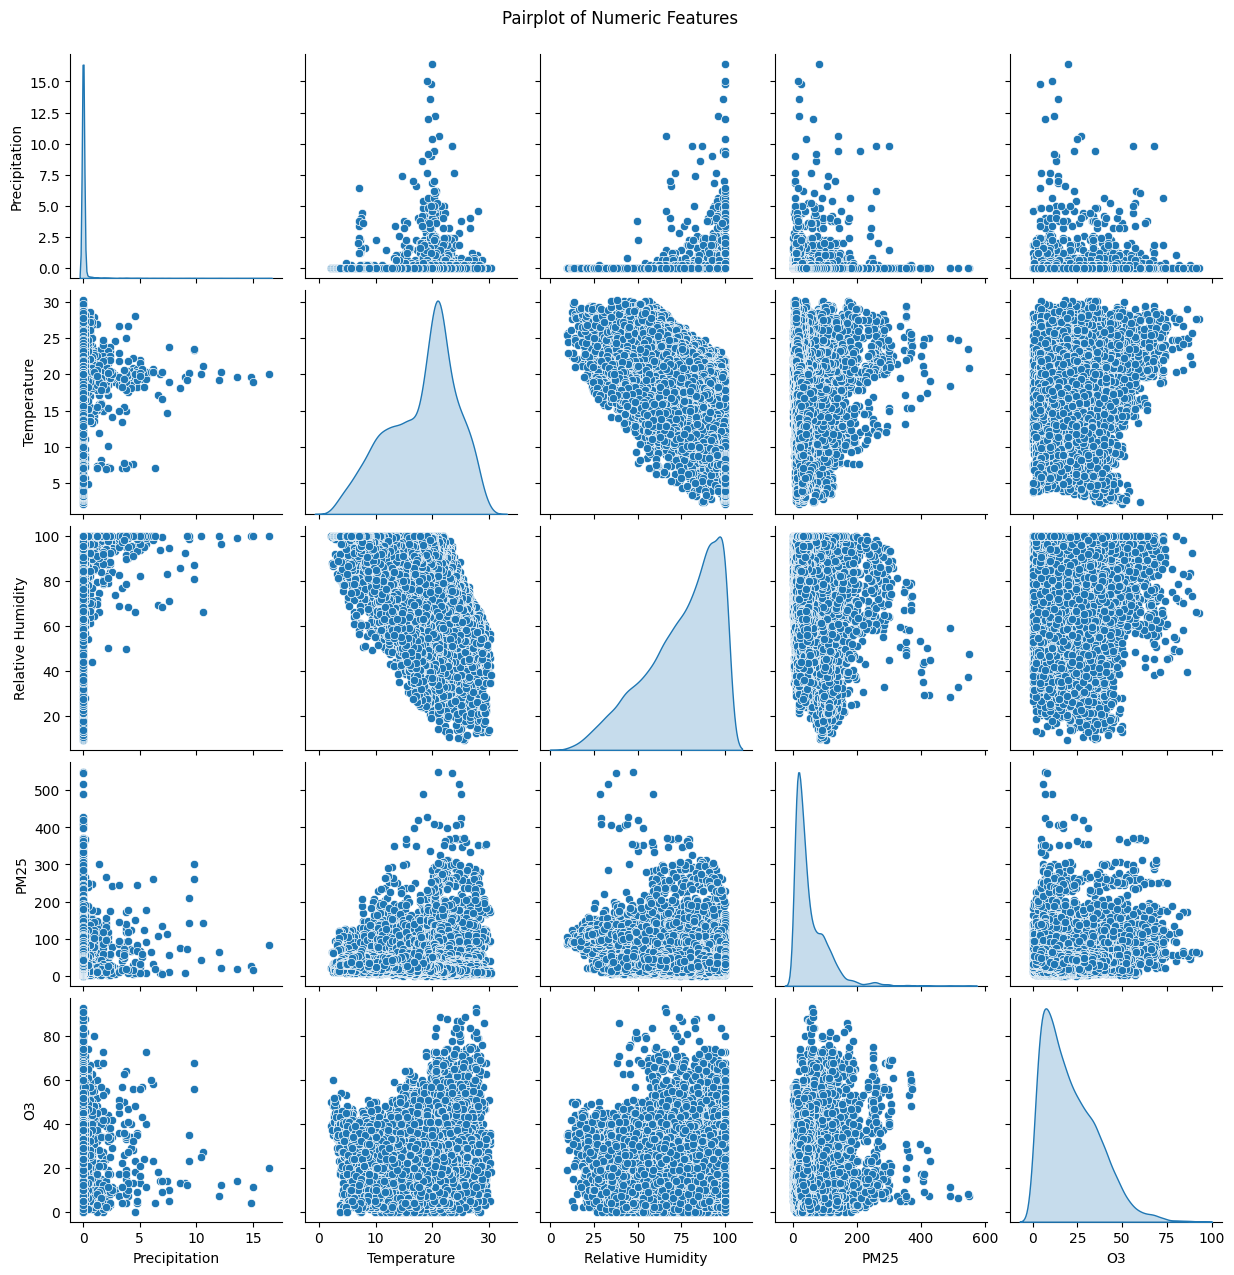

In [70]:
# Pairplot of numeric features
sns.pairplot(df[numerical_columns],diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features',y=1.02)
plt.show()

# Loading and Working with the Filtered Datasets and Analysis of the data

In [71]:
import pandas as pd
data=pd.read_csv('filtered_data.csv')
data.head(60)

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3
0,9/17/2020 3:00,0.0,22.1,84.5,28.9,4
1,9/17/2020 4:00,0.0,22.8,80.7,27.5,4
2,9/17/2020 5:00,0.0,24.1,74.9,25.5,4
3,9/17/2020 6:00,0.0,25.5,70.9,21.3,6
4,9/17/2020 7:00,0.0,25.5,69.6,23.6,7
5,9/17/2020 8:00,0.0,25.0,70.9,24.3,12
6,9/17/2020 9:00,0.0,25.1,72.3,26.6,14
7,9/17/2020 10:00,0.0,25.1,72.5,26.8,20
8,9/17/2020 11:00,0.0,24.9,73.9,26.9,23
9,9/17/2020 12:00,0.0,24.3,74.6,28.7,30


In [72]:
numerical_cols=data.select_dtypes(exclude=['category','object']).columns
category_cols=data.select_dtypes(include=['category','object']).columns
numerical_cols

Index(['Precipitation', 'Temperature', 'Relative Humidity', 'PM25', 'O3'], dtype='object')

In [73]:
category_cols

Index(['DATE'], dtype='object')

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
pip install Scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd

df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y %H:%M')


In [77]:
data.head()


,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3
0,9/17/2020 3:00,0.0,22.1,84.5,28.9,4
1,9/17/2020 4:00,0.0,22.8,80.7,27.5,4
2,9/17/2020 5:00,0.0,24.1,74.9,25.5,4
3,9/17/2020 6:00,0.0,25.5,70.9,21.3,6
4,9/17/2020 7:00,0.0,25.5,69.6,23.6,7


In [78]:
df['day'] = df['DATE'].dt.day
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['hour'] = df['DATE'].dt.hour
df['minute'] = df['DATE'].dt.minute
df['day_of_week'] = df['DATE'].dt.day_name()

In [79]:
data.head()

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3
0,9/17/2020 3:00,0.0,22.1,84.5,28.9,4
1,9/17/2020 4:00,0.0,22.8,80.7,27.5,4
2,9/17/2020 5:00,0.0,24.1,74.9,25.5,4
3,9/17/2020 6:00,0.0,25.5,70.9,21.3,6
4,9/17/2020 7:00,0.0,25.5,69.6,23.6,7


In [80]:
df.head()

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3,day,month,year,hour,minute,day_of_week
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,17,9,2020,3,0,Thursday
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,17,9,2020,4,0,Thursday
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,17,9,2020,5,0,Thursday
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,17,9,2020,6,0,Thursday
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,17,9,2020,7,0,Thursday


In [81]:
# Label encoding for categorical columns
le_day_of_week = LabelEncoder()
le_day = LabelEncoder()
le_month = LabelEncoder()
le_year = LabelEncoder()
le_hour = LabelEncoder()
le_minute = LabelEncoder()


In [82]:

df['day_of_week_encoded'] = le_day_of_week.fit_transform(df['day_of_week'])
df['day_encoded'] = le_day.fit_transform(df['day'])
df['month_encoded'] = le_month.fit_transform(df['month'])
df['year_encoded'] = le_year.fit_transform(df['year'])
df['hour_encoded'] = le_hour.fit_transform(df['hour'])
df['minute_encoded'] = le_minute.fit_transform(df['minute'])


In [83]:
df.head()

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3,day,month,year,hour,minute,day_of_week,day_of_week_encoded,day_encoded,month_encoded,year_encoded,hour_encoded,minute_encoded
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,17,9,2020,3,0,Thursday,4,16,8,0,3,0
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,17,9,2020,4,0,Thursday,4,16,8,0,4,0
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,17,9,2020,5,0,Thursday,4,16,8,0,5,0
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,17,9,2020,6,0,Thursday,4,16,8,0,6,0
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,17,9,2020,7,0,Thursday,4,16,8,0,7,0


In [84]:
df

,DATE,Precipitation,Temperature,Relative Humidity,PM25,O3,day,month,year,hour,minute,day_of_week,day_of_week_encoded,day_encoded,month_encoded,year_encoded,hour_encoded,minute_encoded
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,17,9,2020,3,0,Thursday,4,16,8,0,3,0
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,17,9,2020,4,0,Thursday,4,16,8,0,4,0
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,17,9,2020,5,0,Thursday,4,16,8,0,5,0
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,17,9,2020,6,0,Thursday,4,16,8,0,6,0
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,17,9,2020,7,0,Thursday,4,16,8,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2021-11-13 07:00:00,0.0,11.8,76.5,39.9,24,13,11,2021,7,0,Saturday,2,12,10,1,7,0
9995,2021-11-13 08:00:00,0.0,13.8,63.3,42.9,22,13,11,2021,8,0,Saturday,2,12,10,1,8,0
9996,2021-11-13 09:00:00,0.0,13.7,58.7,45.4,19,13,11,2021,9,0,Saturday,2,12,10,1,9,0
9997,2021-11-13 10:00:00,0.0,13.2,56.0,45.7,22,13,11,2021,10,0,Saturday,2,12,10,1,10,0
